# MART

Multiplicative Algebraic Reconstruction Algorithm

/Users/syedather/opt/anaconda3/envs/orel/lib/python3.10/site-packages/skimage/transform/radon_transform.py:75: UserWarning: Radon transform: image must be zero outside the reconstruction circle
  warn('Radon transform: image must be zero outside the '


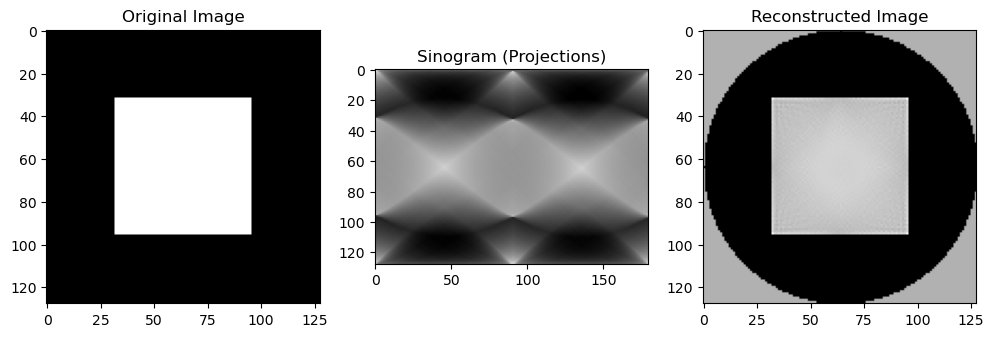

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon

# Description: This script demonstrates the use of the Multiplicative Algebraic Reconstruction Technique (MART)
# for image reconstruction from projections (Radon transform). The example uses a simple phantom of a square
# to illustrate how MART iteratively refines the reconstruction to approach the original image.
# Author: Syed Hussain Ather
# Date: June 13, 2024


# Define image dimensions and phantom
image_size = 128  # 128x128 image
original_image = np.zeros((image_size, image_size), dtype=np.float32)
original_image[32:96, 32:96] = 1  # Simple square object

# Simulate projections (Radon transform)
theta = np.linspace(0., 180., max(image_size, 180), endpoint=False)
sinogram = radon(original_image, theta=theta, circle=True)

# MART parameters
iterations = 10  # Number of MART iterations

# Initialize reconstruction image
reconstruction = np.ones((image_size, image_size), dtype=np.float32)

# MART Iteration
for _ in range(iterations):
    back_projection = iradon(sinogram, theta=theta, circle=True, output_size=image_size)
    correction_factor = np.divide(original_image, back_projection, out=np.ones_like(original_image), where=back_projection != 0)
    reconstruction *= correction_factor

    # Forward project the updated image to update the sinogram
    sinogram = radon(reconstruction, theta=theta, circle=True)

# Display results
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.subplot(132)
plt.imshow(sinogram, cmap='gray')
plt.title('Sinogram (Projections)')
plt.subplot(133)
plt.imshow(reconstruction, cmap='gray')
plt.title('Reconstructed Image')
plt.show()


/var/folders/2g/mg4_q7jn3qndbhzmw0pnlhg40000gn/T/ipykernel_17512/823266324.py:42: RuntimeWarning: overflow encountered in multiply
  reconstruction *= correction
/Users/syedather/opt/anaconda3/envs/orel/lib/python3.10/site-packages/matplotlib/image.py:446: RuntimeWarning: overflow encountered in double_scalars
  newmin = vmid - dv * fact
/Users/syedather/opt/anaconda3/envs/orel/lib/python3.10/site-packages/matplotlib/image.py:451: RuntimeWarning: overflow encountered in double_scalars
  newmax = vmid + dv * fact


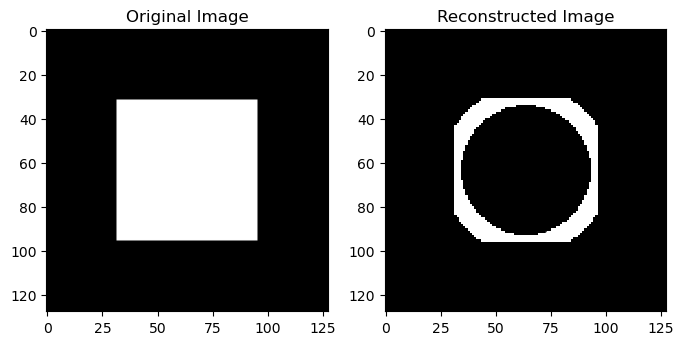

In [6]:
# Author: Syed Hussain Ather
# Date: June 12, 2024
# Description:
# This script adjusts the sinogram indexing to correctly map angle indices and applies the
# MART algorithm to each projection line individually, ensuring that the indices do not exceed
# the sinogram's dimensions.

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from skimage.transform import radon, iradon

def create_projection_graph(theta):
    """
    Create a directed graph from the theta array where each node represents a projection angle,
    and edges represent sequential connections for demonstration purposes.
    """
    G = nx.DiGraph()
    num_angles = len(theta)
    for i in range(num_angles):
        G.add_node(i, angle=theta[i])

    for i in range(num_angles - 1):
        G.add_edge(i, i + 1)
    return G

def apply_mart(graph, sinogram, original_image, iterations):
    """
    Apply MART to reconstruct the image from its sinogram using the projection angles
    specified in the graph.
    """
    reconstruction = np.ones_like(original_image)
    for _ in range(iterations):
        for node in nx.topological_sort(graph):
            angle_index = node
            angle = graph.nodes[node]['angle']
            projection = sinogram[:, angle_index]
            sinogram_projection = np.zeros((sinogram.shape[0], 1))
            sinogram_projection[:, 0] = projection
            back_projection = iradon(sinogram_projection, [angle], circle=True, output_size=original_image.shape[0])
            correction = np.divide(original_image, back_projection, out=np.ones_like(original_image), where=back_projection!=0)
            reconstruction *= correction
    return reconstruction

def main():
    image_size = 128
    original_image = np.zeros((image_size, image_size))
    original_image[32:96, 32:96] = 1
    theta = np.linspace(0., 180., max(image_size, 180), endpoint=False)
    sinogram = radon(original_image, theta=theta, circle=True)
    projection_graph = create_projection_graph(theta)
    reconstructed_image = apply_mart(projection_graph, sinogram, original_image, 10)

    plt.figure(figsize=(8, 4))
    plt.subplot(121)
    plt.imshow(original_image, cmap='gray')
    plt.title('Original Image')
    plt.subplot(122)
    plt.imshow(reconstructed_image, cmap='gray')
    plt.title('Reconstructed Image')
    plt.show()

if __name__ == "__main__":
    main()
